In [ ]:
import cv2
import imutils

In [ ]:
!pip install pytesseract


In [ ]:
import pytesseract

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


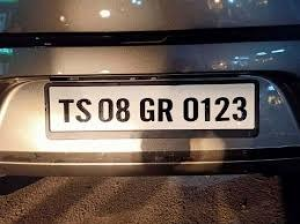

-1

In [ ]:
import cv2
import imutils
from google.colab.patches import cv2_imshow

image = cv2.imread('/content/drive/MyDrive/Car_Plates/6.jpeg')
image = imutils.resize(image, width=300)
cv2_imshow(image)
cv2.waitKey(0)


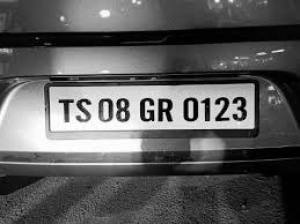

-1

In [ ]:
import cv2
import imutils
from google.colab.patches import cv2_imshow



gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)
cv2.waitKey(0)


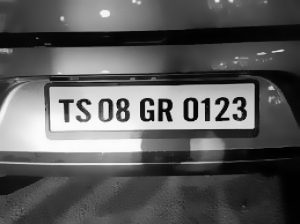

-1

In [ ]:
import cv2
import imutils
from google.colab.patches import cv2_imshow



gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
smooth_image = cv2.bilateralFilter(gray_image, 11, 17, 17)

cv2_imshow(smooth_image)
cv2.waitKey(0)


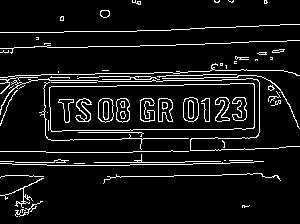

-1

In [ ]:
#Detecting the edges of the smoothened image
import cv2
import imutils
from google.colab.patches import cv2_imshow



gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
smooth_image = cv2.bilateralFilter(gray_image, 11, 17, 17)

# Perform edge detection using Canny
edged = cv2.Canny(smooth_image, 30, 200)

cv2_imshow(edged)
cv2.waitKey(0)


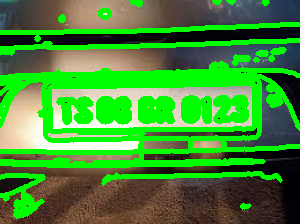

-1

In [ ]:
#Finding the contours from the edged image
import cv2
import imutils
from google.colab.patches import cv2_imshow

image = imutils.resize(image, width=300)

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
smooth_image = cv2.bilateralFilter(gray_image, 11, 17, 17)

# Perform edge detection using Canny
edged = cv2.Canny(smooth_image, 30, 200)

# Find contours
cnts, new = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

image1 = image.copy()
cv2.drawContours(image1, cnts, -1, (0, 255, 0), 3)
cv2_imshow(image1)
cv2.waitKey(0)


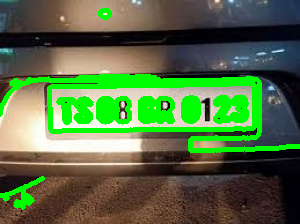

-1

In [ ]:
#Sorting the identified contours
import cv2
import imutils
from google.colab.patches import cv2_imshow

image = imutils.resize(image, width=300)

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
smooth_image = cv2.bilateralFilter(gray_image, 11, 17, 17)

# Perform edge detection using Canny
edged = cv2.Canny(smooth_image, 30, 200)

# Find contours
cnts, new = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# Sort contours by area in descending order and select top 30
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:30]

screenCnt = None

image2 = image.copy()
cv2.drawContours(image2, cnts, -1, (0, 255, 0), 3)

cv2_imshow(image2)
cv2.waitKey(0)


In [ ]:
#Finding the contour with four sides
i=7
for c in cnts:
        perimeter = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.018 * perimeter, True)
        if len(approx) == 4:
                screenCnt = approx
                #Cropping the rectangular part identified as license plate
        x,y,w,h = cv2.boundingRect(c)
        new_img=image[y:y+h,x:x+w]
        cv2.imwrite('./'+str(i)+'.png',new_img)
        i+=1
        break

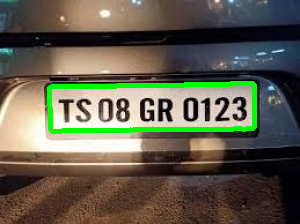

-1

In [ ]:
import cv2
import imutils
from google.colab.patches import cv2_imshow

image = imutils.resize(image, width=300)

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
smooth_image = cv2.bilateralFilter(gray_image, 11, 17, 17)

# Perform edge detection using Canny
edged = cv2.Canny(smooth_image, 30, 200)

# Find contours
cnts, new = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# Sort contours by area in descending order and select top 30
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:30]

screenCnt = None

image2 = image.copy()
cv2.drawContours(image2, cnts, -1, (0, 255, 0), 3)

if len(cnts) > 0:
    # Assuming the first contour is the selected license plate contour
    screenCnt = cnts[0]
    # Drawing the selected contour on the original image
    cv2.drawContours(image, [screenCnt], -1, (0, 255, 0), 3)

cv2_imshow(image)
cv2.waitKey(0)


In [ ]:
!apt-get install tesseract-ocr
!pip install pytesseract


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


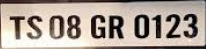

Number plate is: TS 08 GR 0123



In [ ]:
import cv2
import imutils
from google.colab.patches import cv2_imshow
import pytesseract

# Path to the cropped license plate image
Cropped_loc = './7.png'

# Display the cropped image
cropped_image = cv2.imread(Cropped_loc)
cv2_imshow(cropped_image)
cv2.waitKey(0)

# Extract text from the cropped license plate image
plate = pytesseract.image_to_string(cropped_image, lang='eng')
print("Number plate is:", plate)
